# Завдання

_Вправа 1: натренуйте модель дерева рішень та виконайте пошук гіперпараметрів для moons dataset._ \
a. Згенеруйте датасет, використовуючи функцію `make_moons(n_samples=10000, noise=0.4)`. \
b. Розбийте її на тренувальну та тестувальну частини, використовуючи функцію `train_test_split()`. \
c. Використайте пошук з крос-валідацією (`GridSearchCV`, `RandomizedSearchCV`) для пошуку гіперпараметрів моделі `DecisionTreeClassifier`. Зокрема, спробуйте різні значення для параметра `max_leaf_nodes`.

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsOneClassifier

In [2]:
X, y = make_moons(n_samples=10000, noise=0.4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
def display_metrics(model, X_test, y_test, title):
    fig, ax = plt.subplots(figsize=(6,4))
    y_pred = model.predict(X_test)
    cm_list = confusion_matrix(y_test, y_pred)
    cm_plot = sns.heatmap(cm_list, annot=True, cmap="viridis", fmt="g", ax=ax)
    cm_plot.set_xlabel("Actual values")
    cm_plot.set_ylabel("Predicted values")
    cm_plot.set_title(title)
    plt.show()
    report = classification_report(y_test, y_pred)
    print(report)

In [5]:
param_grid = {
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'max_leaf_nodes': np.arange(2, 50)
}

In [9]:
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Найкращі параметри:", grid_search.best_params_)
print("Найкраща точність:", grid_search.best_score_)

Fitting 5 folds for each of 27648 candidates, totalling 138240 fits
Найкращі параметри: {'max_depth': 9, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_samples_split': 2}
Найкраща точність: 0.85975


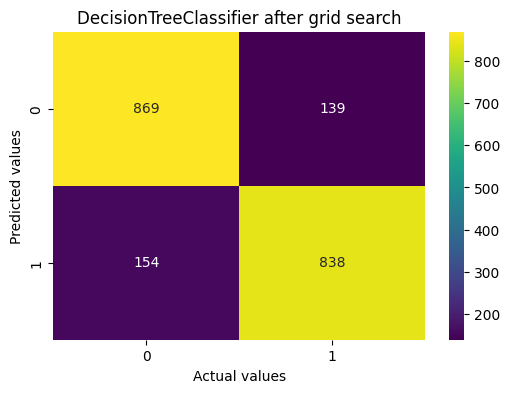

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1008
           1       0.86      0.84      0.85       992

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [10]:
display_metrics(grid_search.best_estimator_, X_test, y_test, title="DecisionTreeClassifier after grid search")

In [11]:
random_search = RandomizedSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
random_search.fit(X_train, y_train)

print("Найкращі параметри:", random_search.best_params_)
print("Найкраща точність:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Найкращі параметри: {'min_samples_split': 3, 'min_samples_leaf': 7, 'max_leaf_nodes': 26, 'max_depth': 7}
Найкраща точність: 0.858


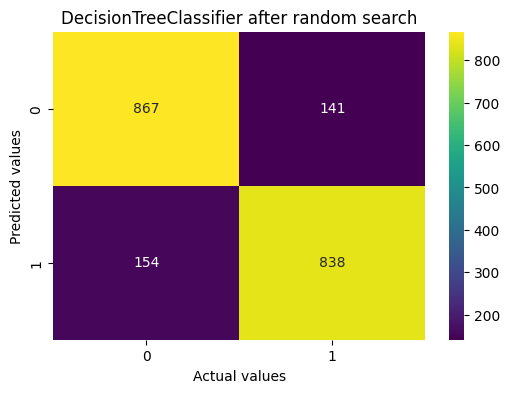

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1008
           1       0.86      0.84      0.85       992

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [12]:
display_metrics(random_search.best_estimator_, X_test, y_test, title="DecisionTreeClassifier after random search")

After searching for best hyperparameters for the model, the results show that the best max_leaf_nodes number is 10 for both approaches. The other parameters differ.

_Вправа 2_ : \
a. Завантажте датасет MNIST та розбийте його на тренувальну, валідаційну та тестувальну частини (наприклад, 50 000 / 10 000 / 10
000). \
b. Натренуйте різні класифікаційні моделі (Random Forest classifier, Logistic Regression, SVM). \
c. Далі, об'єднайте їх за допомогою голосування. \
d. Натренуйте нову модель, використовуючи виходи попередніх моделей на валідаційній вибірці (це будуть нові ознаки і нова тренувальна вибірка для даної моделі). Протестуйте отриманий ланцюжок на тренувальний вибірці. Такий спосіб поєднання моделей називається стогуванням (stacking).  

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X1 = mnist["data"]
y1 = mnist["target"].astype(np.uint8)

X_train1 = X1[:50000]
y_train1 = y1[:50000]
X_test1 = X1[60000:]
y_test1 = y1[60000:]

X_val = X1[50000:60000]
y_val = y1[50000:60000]

In [7]:
X_train1

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
np.unique(y_train1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
randomForest_clf = RandomForestClassifier(random_state=42)
randomForest_clf.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [8]:
randomForest_clf = OneVsOneClassifier(RandomForestClassifier(random_state=42))
randomForest_clf.fit(X_train1, y_train1)

OneVsOneClassifier(estimator=RandomForestClassifier(random_state=42))

In [10]:
scaler = StandardScaler()

In [11]:
X_train_normalized = scaler.fit_transform(X_train1)
X_test_normalized = scaler.transform(X_test1)

In [21]:
log_clf = LogisticRegression(C=0.3593813663804626, l1_ratio=0.5, max_iter=15000, penalty='elasticnet', solver='saga')
log_clf.fit(X_train_normalized, y_train1)

LogisticRegression(C=0.3593813663804626, l1_ratio=0.5, max_iter=15000,
                   penalty='elasticnet', solver='saga')

In [ ]:
log_clf = OneVsOneClassifier(LogisticRegression(C=0.3593813663804626, l1_ratio=0.5, max_iter=15000, penalty='elasticnet', solver='saga'))
log_clf.fit(X_train_normalized, y_train1)

In [12]:
import pickle

with open('logistic_model_homework2.pkl', 'rb') as file:
    log_clf1 = pickle.load(file)

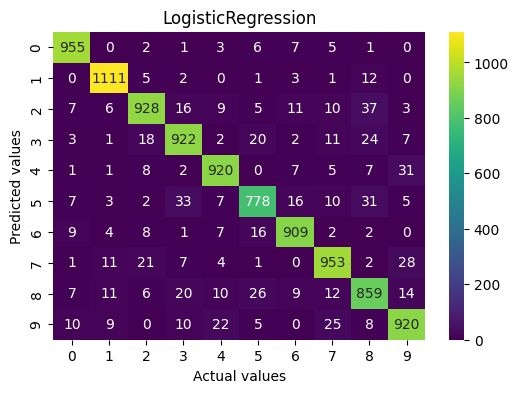

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.94      0.94       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.92      0.93      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [26]:
display_metrics(log_clf, X_test_normalized, y_test1, title="LogisticRegression")

In [15]:
from sklearn.multiclass import OneVsOneClassifier

In [16]:
svm_clf1 = OneVsOneClassifier(SVC(kernel="linear"))
svm_clf1.fit(X_train_normalized, y_train1)

OneVsOneClassifier(estimator=SVC(kernel='linear'))

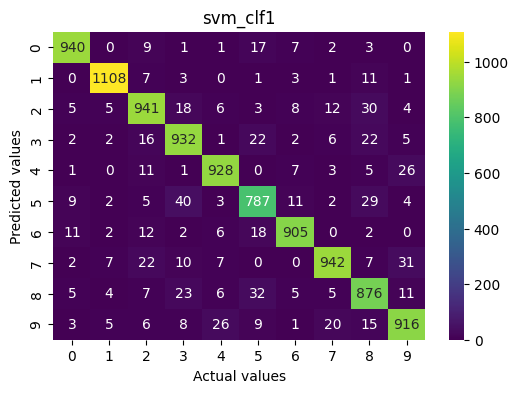

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.91      0.91      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.95      0.94       982
           5       0.89      0.88      0.88       892
           6       0.95      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.88      0.90      0.89       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [17]:
display_metrics(svm_clf1, X_test_normalized, y_test1, title="svm_clf1")

In [18]:
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X_train_normalized, y_train1)

SVC(kernel='linear', random_state=42)

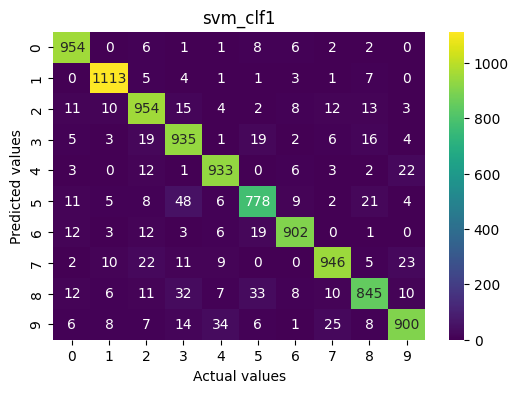

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.92      0.91      1032
           3       0.88      0.93      0.90      1010
           4       0.93      0.95      0.94       982
           5       0.90      0.87      0.89       892
           6       0.95      0.94      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.92      0.87      0.89       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [19]:
display_metrics(svm_clf, X_test_normalized, y_test1, title="svm_clf1")

In [25]:
voting_clf = VotingClassifier(
    estimators=[("Random Forest Classifier", randomForest_clf), ("Logistic regression", log_clf), ("SVM", svm_clf)],
    voting='hard'
)
voting_clf.fit(X_train_normalized, y_train1)

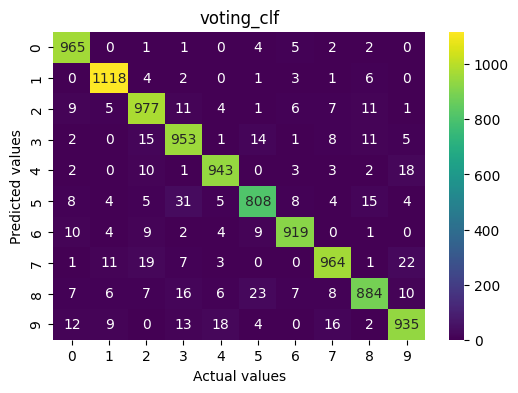

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.96      0.96      0.96       982
           5       0.94      0.91      0.92       892
           6       0.97      0.96      0.96       958
           7       0.95      0.94      0.94      1028
           8       0.95      0.91      0.93       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [30]:
display_metrics(voting_clf, X_test_normalized, y_test1, title="voting_clf")

In [34]:
X_val

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
50000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_val_normalized = scaler.fit_transform(X_val)
np.unique(X_val_normalized)

array([-1.25530906, -1.24615319, -1.24484291, ..., 99.99499987,
       99.99499987, 99.99499987])

In [41]:
stacking_clf = StackingClassifier(
    estimators=[("Random Forest Classifier", randomForest_clf), ("Logistic regression", log_clf), ("SVM", svm_clf)],
    final_estimator=LogisticRegression(max_iter=15000)
)
stacking_clf.fit(X_val_normalized, y_val)

StackingClassifier(estimators=[('Random Forest Classifier',
                                RandomForestClassifier(random_state=42)),
                               ('Logistic regression',
                                LogisticRegression(C=0.3593813663804626,
                                                   l1_ratio=0.5, max_iter=15000,
                                                   penalty='elasticnet',
                                                   solver='saga')),
                               ('SVM', SVC(kernel='linear', random_state=42))],
                   final_estimator=LogisticRegression(max_iter=15000))

In [39]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

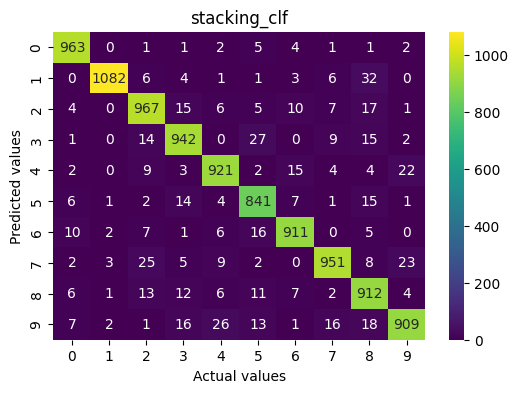

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.95      0.97      1135
           2       0.93      0.94      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.91      0.94      0.93       892
           6       0.95      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.89      0.94      0.91       974
           9       0.94      0.90      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [42]:
display_metrics(stacking_clf, X_test_normalized, y_test1, title="stacking_clf")